In [1]:
import datetime 
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import scipy
import seaborn as sns
%matplotlib inline

sns.set_style("white")

------------ 

# Data preparation

In [3]:
# read the data
cars = pd.read_csv("autos.csv", encoding="Latin1", parse_dates = ['dateCrawled','dateCreated','lastSeen'])

In [3]:
# clean the data:
# only these values make sense for car age:
cars = cars[(cars.yearOfRegistration < 2017) & (cars.yearOfRegistration > 1900)]
# we don't want to have non-sensible prices:
cars = cars[(cars.price < 500000) & (cars.price > 500)]
# only interested in working cars for now:
cars = cars[cars.notRepairedDamage != "ja"]

In [4]:
cars = cars.assign(mileage_cat=[("low", "medium", "med-high", "high")[min(3, int(math.floor(x/50000)))] for x in cars.kilometer])

In [5]:
# age is a better feature than year of registration
# here we use the number of days since registration
cars = cars.assign(age=[datetime.timedelta(seconds=(x.dateCreated.timestamp() - 
                        (datetime.datetime.strptime(
                            str(x.yearOfRegistration) + str(x.monthOfRegistration), "%Y%M")).timestamp())).days
                        for i, x in cars.iterrows()])

In [17]:
# only use cars not registered in the future
cars = cars[cars.age > 0]
# only use cars with PS
cars = cars[cars.powerPS > 0]
# only use cars with kilometers
cars = cars[cars.kilometer > 0]

In [18]:
# save the modified csv
cars.to_csv("autos.mod.csv")

In [2]:
# to start with cleaned & modified data:
cars = pd.read_csv("autos.mod.csv")

In [7]:
cars.offerType.value_counts()

Angebot    292692
Gesuch          3
Name: offerType, dtype: int64

(0, 50000)

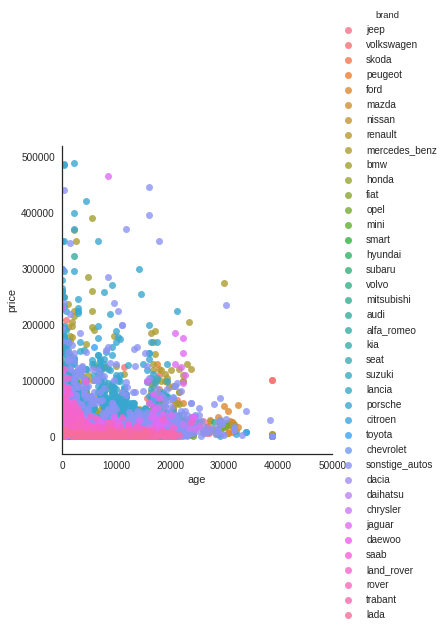

In [8]:
#cars.plot(x="yearOfRegistration", y="price", kind="scatter", ylim=(0, 1000000))
plt.figure()
sns.lmplot('age', 'price', data=cars, fit_reg=False, hue="brand")
plt.xlim(0, 50000)

In [9]:
# most common models
cars.model.value_counts()[:20]

golf           23435
andere         20893
3er            17214
polo            9131
a4              8674
passat          8482
corsa           8364
astra           8094
c_klasse        7784
5er             7485
e_klasse        6562
a3              5604
a6              5120
transporter     4720
focus           4708
fiesta          4011
2_reihe         4004
fortwo          3847
1er             3511
a_klasse        3483
Name: model, dtype: int64

In [10]:
# get general depreciation
from sklearn import linear_model
clf = linear_model.LinearRegression()
clf.fit(cars.loc[:, ("kilometer", "yearOfRegistration")], y=cars.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
clf.coef_

array([ -8.23876684e-02,   2.49589934e+02])

In [ ]:
# compare depreciation per model

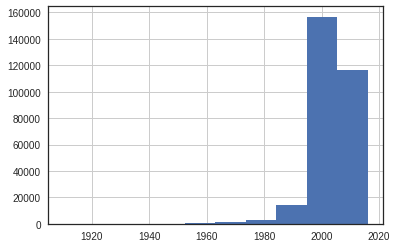

In [12]:
cars.yearOfRegistration.hist()

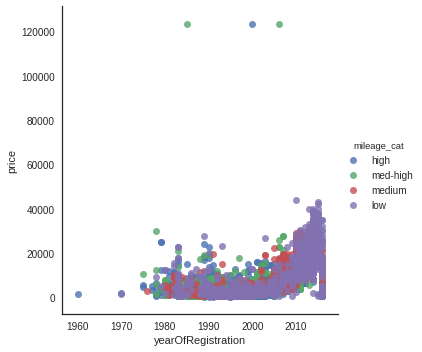

In [13]:

sns.lmplot('yearOfRegistration', 'price', data=cars[cars.model=="golf"], fit_reg=False, hue="mileage_cat")

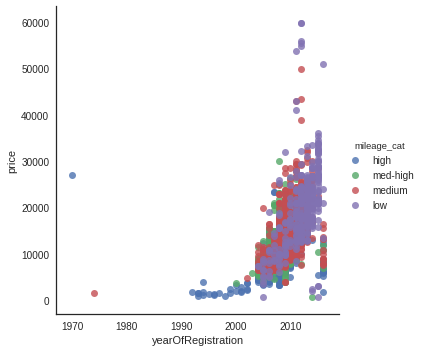

In [14]:

sns.lmplot('yearOfRegistration', 'price', data=cars[cars.model=="1er"], fit_reg=False, hue="mileage_cat")

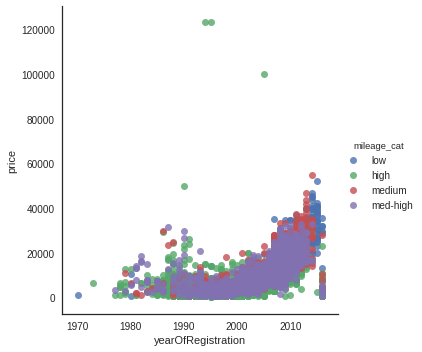

In [15]:
sns.lmplot('yearOfRegistration', 'price', data=cars[cars.model=="3er"], fit_reg=False, hue="mileage_cat")

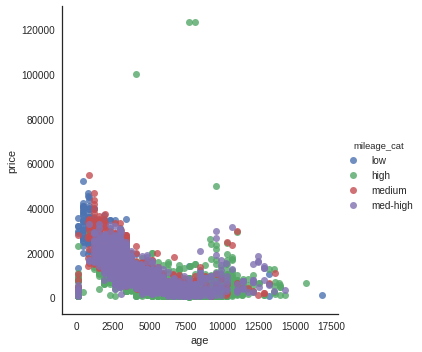

In [17]:
sns.lmplot('age', 'price', data=cars[cars.model=="3er"], fit_reg=False, hue="mileage_cat")

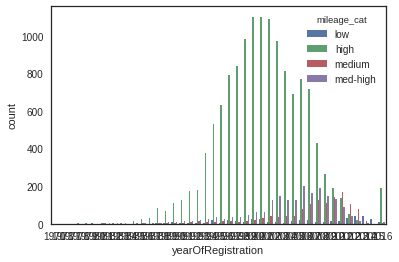

In [16]:
sns.countplot(x="yearOfRegistration", hue="mileage_cat", data=cars[cars.model=="3er"])

In [69]:
# write function for fit parameters for one model
# run function for all models > 100 entries
# test accuracy for each
# see how good my accuracy is, maybe also depending on input data

I predict a 1 year old Golf with 150 PS and 10k kilometers on the clock to cost ~ 19834.0525583
I predict a 3 year old Golf with 150 PS and 40k kilometers on the clock to cost ~ 18663.842776
theta: [  5803.34791021   4862.87290755  -2761.94753465 -11857.44148905
  -9846.50058021     26.64360782   8248.57604708   1786.44340555
    845.85474876   3079.53675475   3590.64724925    244.11205947
  -3092.84256481    675.89154686    215.29556731    -41.4937492
   -182.61427769     75.73145632    -19.91262196    400.41295489
    -23.31046222    -23.3449521     -30.69501475   -533.32976773
  -2258.75461795]


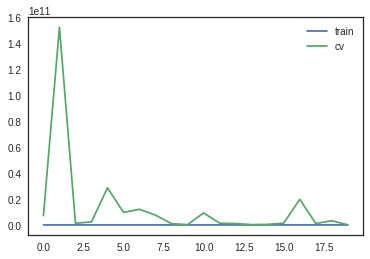

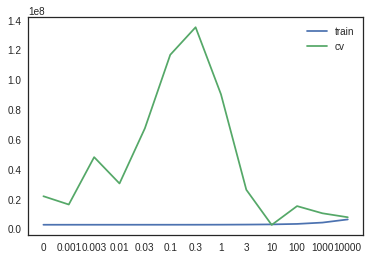

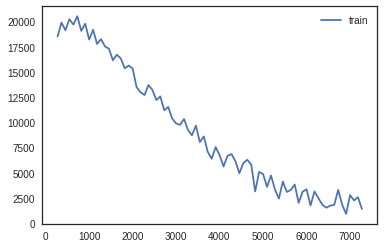

In [4]:
# try to fit model
import main
import importlib
importlib.reload(main)
main.fit_params(cars[cars.model=="golf"].loc[:, ("powerPS", "kilometer", "age")], cars.price[cars.model=="golf"])

I predict a 1 year old Golf with 150 PS and 10k kilometers on the clock to cost ~ 30027.941391
I predict a 3 year old Golf with 150 PS and 40k kilometers on the clock to cost ~ 26657.085277
theta: [  6.74085112e+03   5.76339730e+03  -2.68452277e+03  -1.35612712e+04
  -3.45263766e+04   2.18717485e+03   9.98774075e+03   9.20717716e+03
  -1.50658109e+03   4.72073354e+03   1.56170386e+04   1.00228266e+02
  -4.28236230e+03   2.99471201e+03  -3.59514187e+01  -2.95799183e+01
  -1.55485565e+03  -2.17528376e+03   5.15795917e+03   5.77812546e+03
   2.42485286e+03  -1.58974880e+04  -4.08668653e+03  -1.11609785e+03
   8.86706283e+03]


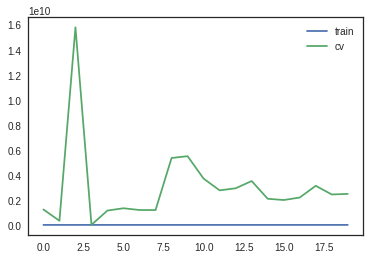

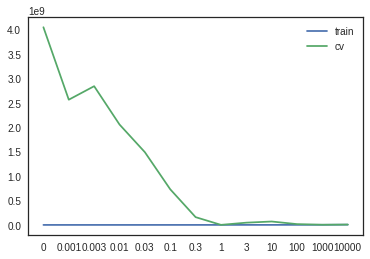

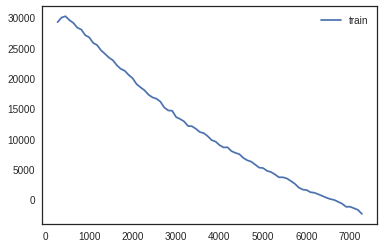

In [12]:
# try to fit model
import main
import importlib
importlib.reload(main)
main.fit_params(cars[cars.model=="3er"].loc[:, ("powerPS", "kilometer", "age")], cars.price[cars.model=="3er"])

I predict a 1 year old Golf with 150 PS and 10k kilometers on the clock to cost ~ 24111.9826645
I predict a 3 year old Golf with 150 PS and 40k kilometers on the clock to cost ~ 18914.244202
theta: [  1.18247782e+04   2.48020265e+02  -8.83252752e+02  -1.21852333e+03
   6.04694294e+00  -6.71193377e+02  -5.05300271e+02   1.15614818e-01
  -5.30142221e+02  -4.19368879e+01   2.05444424e-03  -9.14034973e+01
   4.28966074e+01   3.37264150e-02   1.50821807e+02  -2.24313103e+02
  -1.17209234e+03   6.97788055e+02   2.08248148e+02  -7.71959357e+02
   1.63791940e+02  -1.63215786e+02  -4.33812001e+02  -5.35643971e+01
  -1.83457930e+02]


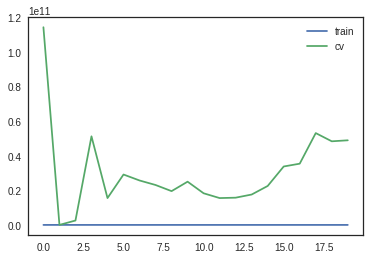

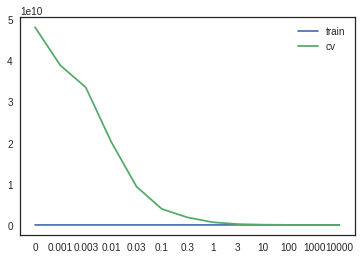

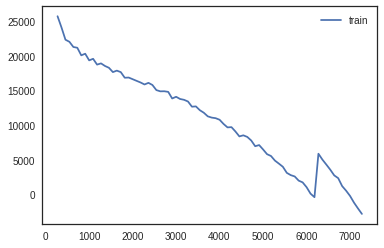

In [10]:
# try to fit model
import main
import importlib
importlib.reload(main)
main.fit_params(cars[cars.model=="1er"].loc[:, ("powerPS", "kilometer", "age")], cars.price[cars.model=="1er"])

All in all this seems to work OK. We can see how the model overfits without regularization and how the regularization fixes that. The depreciation curve show nicely how the cars lose value differently.